# Using HIF datasets with HAT

[HAT (Hypergraph Analysis Toolbox)](https://hypergraph-analysis-toolbox.readthedocs.io/en/latest/) is a python package for studying the structure and dynamics of hypergraphs. This notebook provides examples to make `HAT.Hypergraph`s compatible with other libraries based on the HIF standard.

This notebook has three parts:
1. Load a HIF file and build a `HAT.Hypergraph`
2. Download HIF files from the [HIF-datasets](https://github.com/Jpickard1/HIF-datasets/tree/main) repository using HAT.
3. Write a `HAT.Hypergraph` to a HIF file

## Load HIF File

In [1]:
import json
import os

import fastjsonschema

In [2]:
with open(os.path.join("data", "e-coli.json"), "r") as file:
    # Load the JSON data from the file
    hif_data = json.load(file)

## Build a `HAT.Hypergraph` from HIF

The `HAT.Hypergraph.from_hif` method converts the data loaded from a HIF `JSON` file into a Hypergraph.

In [3]:
from HAT import Hypergraph

HG = Hypergraph.from_hif(hif_data)

### Node and Edge Metadata

Metadata associated with each node can be viewed in the `nodes` and `edges` dataframes:

In [4]:
HG.nodes

,Nodes,name
0,mal__L_c,L-Malate
1,acald_e,Acetaldehyde
2,actp_c,Acetyl phosphate
3,gln__L_c,L-Glutamine
4,3pg_c,3-Phospho-D-glycerate
...,...,...
67,adp_c,ADP C10H12N5O10P2
68,atp_c,ATP C10H12N5O13P3
69,nh4_c,Ammonium
70,h_c,H+


In [5]:
HG.edges

,edge,name,Nodes,Edges
0,GLUt2r,L glutamate transport via proton symport reve...,"[62, 71, 11, 70]",0
1,ICDHyr_reverse,Isocitrate dehydrogenase (NADP),"[46, 39, 36, 45, 56]",1
2,GAPD,Glyceraldehyde-3-phosphate dehydrogenase,"[41, 23, 16, 70, 58, 51]",2
3,MALS,Malate synthase,"[49, 57, 55, 0, 26, 70]",3
4,MDH_reverse,Malate dehydrogenase,"[18, 70, 58, 0, 23]",4
...,...,...,...,...
136,EX_h2o_e,H2O exchange,[47],136
137,ACt2r_reverse,Acetate reversible transport via proton symport,"[70, 44, 10, 71]",137
138,PYRt2,Pyruvate transport in via proton symport,"[53, 71, 70, 43]",138
139,SUCDi,Succinate dehydrogenase (irreversible),"[65, 15, 12, 42]",139


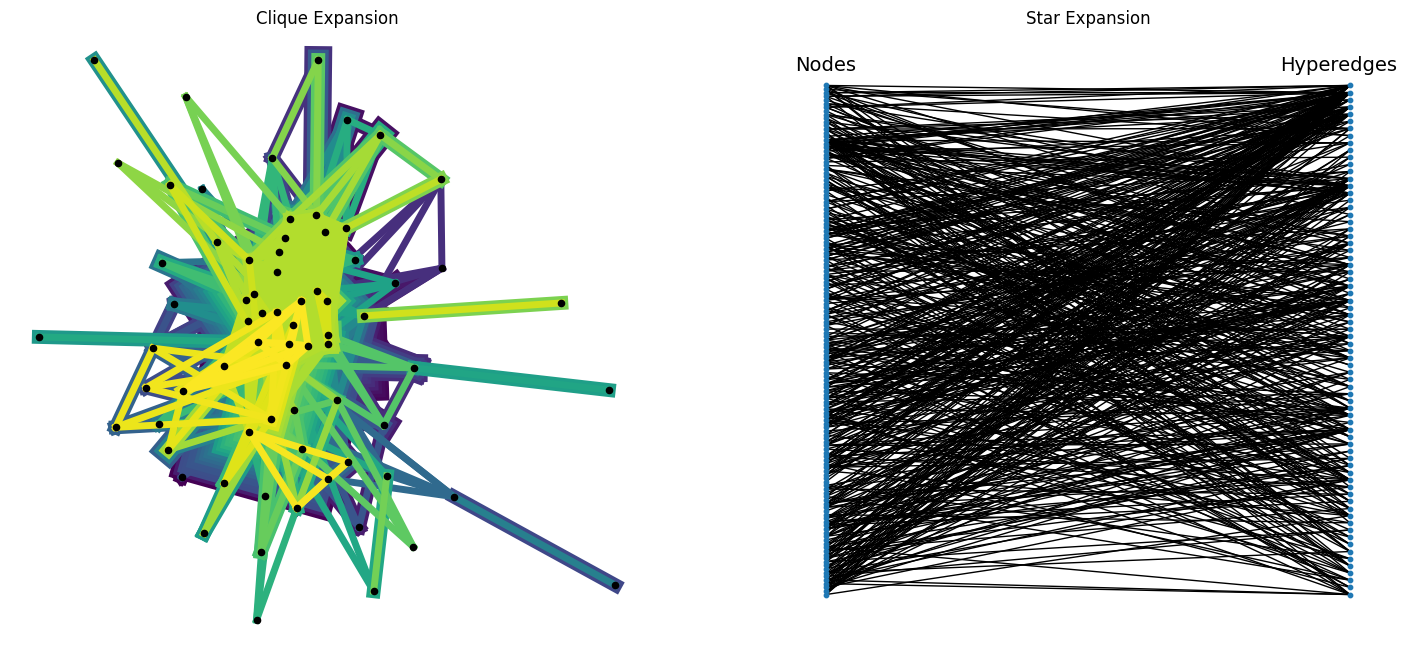

In [6]:
import matplotlib.pyplot as plt
from HAT import draw

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
plt.sca(axes[0])
draw.clique(HG, labels=False)  # , shade_rows=False)
axes[0].set_axis_off()
axes[0].set_title("Clique Expansion")

plt.sca(axes[1])
draw.bipartite(HG, node_size=10)
axes[1].text(0.8, 0.6, "Hyperedges", fontsize=14)
axes[1].text(-0.6, 0.6, "Nodes", fontsize=14)
axes[1].set_title("Star Expansion")

plt.show()

## HIF-datasets

In [7]:
from HAT import Hypergraph, datasets

In [8]:
HG = datasets.load("KEGG_2021_Human")

Loading KEGG_2021_Human from local cache: /home/jpic/Hypergraph-Analysis-Toolbox/Python/HAT/data/KEGG_2021_Human.hif


In [9]:
HG.nodes.columns = ["Nodes", "Gene"]
HG.nodes

,Nodes,Gene
0,0,ECI2
1,1,ETS1
2,2,HSD3B2
3,3,CXCL5
4,4,HMMR
...,...,...
8073,8073,COX14
8074,8074,DERL1
8075,8075,KRT15
8076,8076,SLX1A


In [12]:
from HAT.metrics import degree_centrality

degrees = degree_centrality(HG)

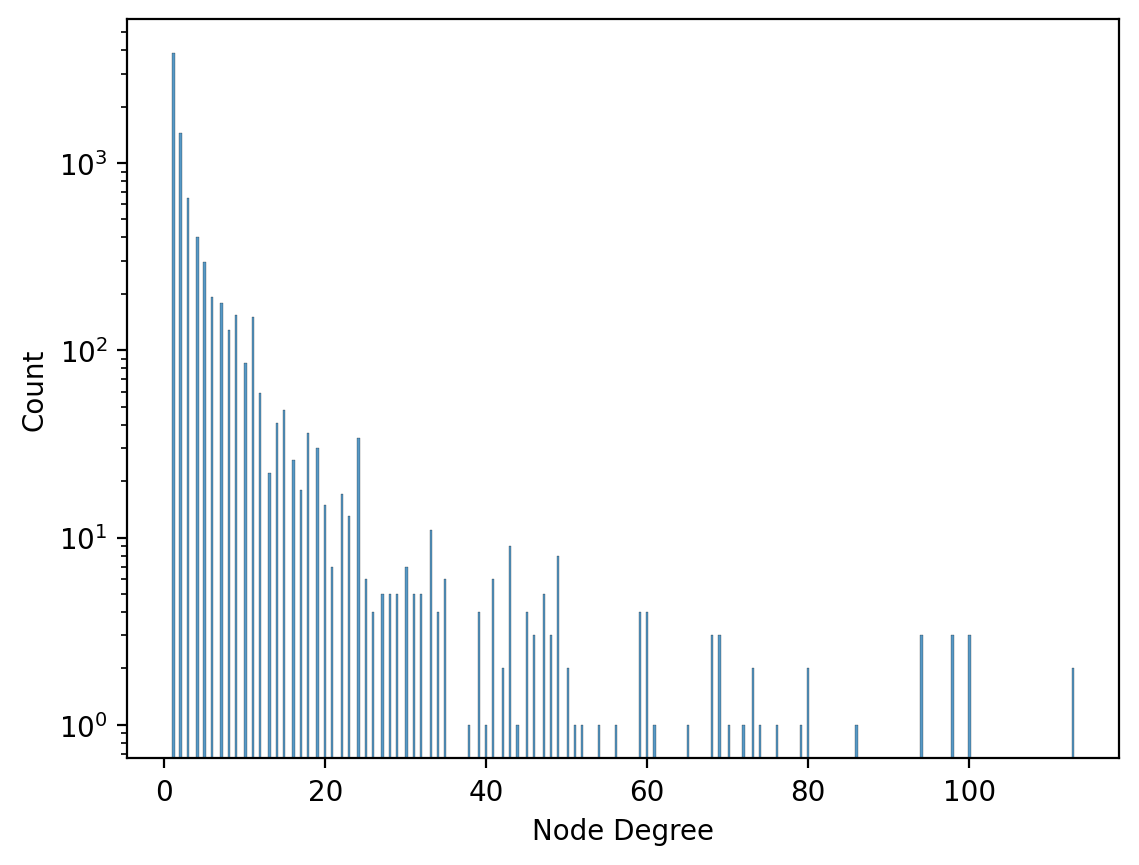

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=200)
sns.histplot(data=HG.nodes, x="degree")
plt.yscale("log")
plt.xlabel("Node Degree")
plt.show()

## Convert Back to HIF

The `Hypergraph.to_hif` method converts the hypergraph object back to a python dictionary according to the HIF schema. This dictionary can be saved to a `JSON` file.

In [ ]:
hif_output = HG.to_hif()

In [ ]:
schema = json.load(open("../schemas/hif_schema.json", "r"))
validator = fastjsonschema.compile(schema)

In [ ]:
## The validator confirms the json read conforms to the HIF standard
output = validator(hif_output)

print("metadata: ", output["metadata"], "\n")
print("network-type: ", output["network-type"])